<h1 style="color:red;">Análisis Exploratorio de Datos</h1>
Enlace donde obtener el dataset y toda la información sobre sus columnas

https://www.kaggle.com/datasets/uciml/mushroom-classification

Dado que los valores son poco claros, aquí pongo lo que significa cada uno:

### Clases(class)
comestible = e

venenoso = p

### Forma del sombrero (cap-shape)
campana = b

cónico = c

convexo = x

plano = f

con protuberancias (nudoso) = k

hundido = s

### Superficie del sombrero (cap-surface)
fibrosa = f

con surcos = g

escamosa = y

lisa = s

### Color del sombrero (cap-color)
marrón = n

beige = b

canela = c

gris = g

verde = r

rosado = p

púrpura = u

rojo = e

blanco = w

amarillo = y

### Magulladuras (bruises)
con magulladuras = t

sin magulladuras = f

### Olor (odor)
almendra = a

anís = l

creosota = c

a pescado = y

fétido = f

mohoso = m

ninguno = n

picante = p

especiado = s

### Unión de las láminas (gill-attachment)
adheridas = a

descendentes = d

libres = f

escotadas = n

### Espaciado de las láminas (gill-spacing)
juntas = c

apiñadas = w

separadas = d

### Tamaño de las láminas (gill-size)
anchas = b

estrechas = n

### Color de las láminas (gill-color)
negro = k

marrón = n

beige = b

chocolate = h

gris = g

verde = r

naranja = o

rosado = p

púrpura = u

rojo = e

blanco = w

amarillo = y

### Forma del tallo (stalk-shape)
ensanchado = e

afilado = t

### Raíz del tallo (stalk-root)
bulbosa = b

en forma de maza = c

con copa = u

igual = e

con rizomorfos = z

enraizada = r

faltante = ?

### Superficie del tallo sobre el anillo (stalk-surface-above-ring)
fibrosa = f

escamosa = y

sedosa = k

lisa = s

### Superficie del tallo bajo el anillo (stalk-surface-below-ring)
fibrosa = f

escamosa = y

sedosa = k

lisa = s

### Color del tallo sobre el anillo (stalk-color-above-ring)
marrón = n

beige = b

canela = c

gris = g

naranja = o

rosado = p

rojo = e

blanco = w

amarillo = y

### Color del tallo bajo el anillo (stalk-color-below-ring)
marrón = n

beige = b

canela = c

gris = g

naranja = o

rosado = p

rojo = e

blanco = w

amarillo = y

### Tipo de velo (veil-type)
parcial = p

universal = u

### Color del velo (veil-color)
marrón = n

naranja = o

blanco = w

amarillo = y

### Número de anillos (ring-number)
ninguno = n

uno = o

dos = t

### Tipo de anillo (ring-type)
telarañoso = c

evanescente = e

acampanado = f

grande = l

ninguno = n

colgante = p

envolvente = s

zonado = z

### Color de la impresión de esporas (spore-print-color)
negro = k

marrón = n

beige = b

chocolate = h

verde = r

naranja = o

púrpura = u

blanco = w

amarillo = y

### Población (population)
abundante = a

agrupada = c

numerosa = n

dispersa = s

varias = v

solitaria = y

### Hábitat (habitat)
pastos = g

hojas = l

praderas = m

senderos = p

urbano = u

desechos = w

bosque = d

<h1 style="color:red;">Carga del dataset</h1>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA


sns.set_theme(style="whitegrid")


df = pd.read_csv("../data/raw/mushrooms.csv")

print({df.shape})
df.head()
df.info()
df.describe(include="all")

{(8124, 23)}
<class 'pandas.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   class                     8124 non-null   str  
 1   cap-shape                 8124 non-null   str  
 2   cap-surface               8124 non-null   str  
 3   cap-color                 8124 non-null   str  
 4   bruises                   8124 non-null   str  
 5   odor                      8124 non-null   str  
 6   gill-attachment           8124 non-null   str  
 7   gill-spacing              8124 non-null   str  
 8   gill-size                 8124 non-null   str  
 9   gill-color                8124 non-null   str  
 10  stalk-shape               8124 non-null   str  
 11  stalk-root                8124 non-null   str  
 12  stalk-surface-above-ring  8124 non-null   str  
 13  stalk-surface-below-ring  8124 non-null   str  
 14  stalk-color-above-ring    8124 non-nul

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


El dataset original contiene 8124 filas y 23 columnas categóricas, incluyendo la variable objetivo "class" que nos dice si un hongo es comestible (‘e’) o venenoso (‘p’). No se detectan valores nulos.
Algunas variables, como veil-type, presentan un solo valor para todas las instancias, mientras que otras, como cap-color o spore-print-color, muestran una mayor diversidad de categorías. Esta observación guía la limpieza previa, en la que se eliminaron columnas con información escasa para el modelado posterior.

<h1 style="color:red;">Distribución de la variable objetivo</h1>

class
e    4208
p    3916
Name: count, dtype: int64
class
e    0.517971
p    0.482029
Name: proportion, dtype: float64


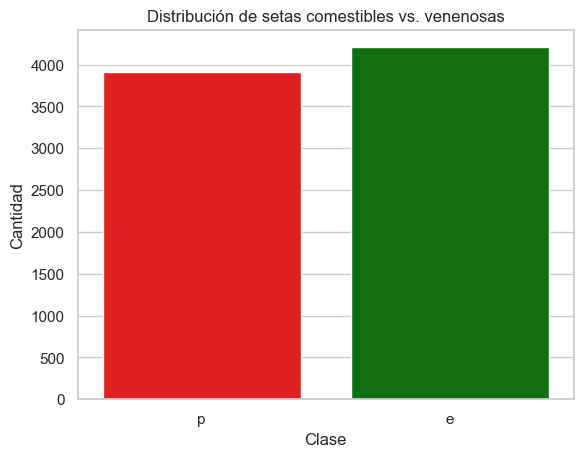

In [5]:
# Conteo de clases
print(df['class'].value_counts())
print(df['class'].value_counts(normalize=True))

# Gráfico con colores personalizados
colores = {'e':'green', 'p':'red'}
sns.countplot(data=df, x='class', hue='class',palette=colores, dodge=False, legend=False)
plt.title("Distribución de setas comestibles vs. venenosas")
plt.xlabel("Clase")
plt.ylabel("Cantidad")
plt.show()

La variable objetivo **class** muestra que el dataset está relativamente balanceado: el 52% de los hongos son comestibles **(‘e’)** y el 48% venenosos **(‘p’)**. Este balance sugiere que los modelos supervisados no estarán sesgados hacia ninguna clase y que el clustering podrá detectar patrones sin verse afectado por dominancia de una clase.
En el gráfico, las setas **comestibles** se representan en verde y las **venenosas** en rojo para facilitar la interpretación visual.

<h1 style="color:red;">Análisis univariado</h1>


Columna: cap-shape
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64
cap-shape
x    0.450025
f    0.387986
k    0.101920
b    0.055638
s    0.003939
c    0.000492
Name: proportion, dtype: float64


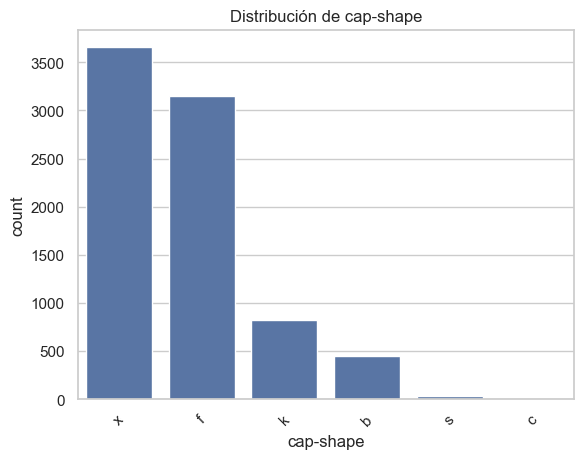


Columna: cap-surface
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64
cap-surface
y    0.399311
s    0.314623
f    0.285574
g    0.000492
Name: proportion, dtype: float64


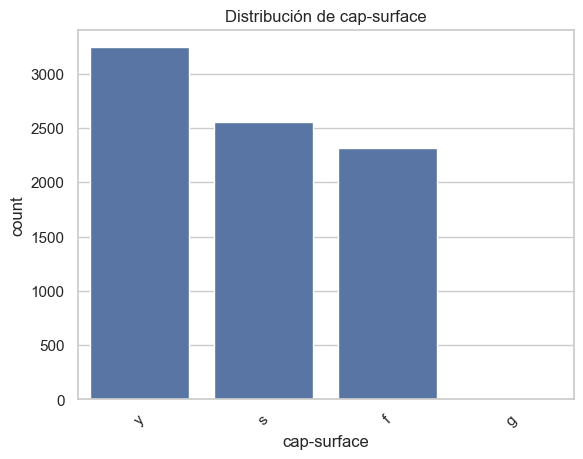


Columna: cap-color
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64
cap-color
n    0.281142
g    0.226489
e    0.184638
y    0.131955
w    0.128016
b    0.020679
p    0.017725
c    0.005416
u    0.001969
r    0.001969
Name: proportion, dtype: float64


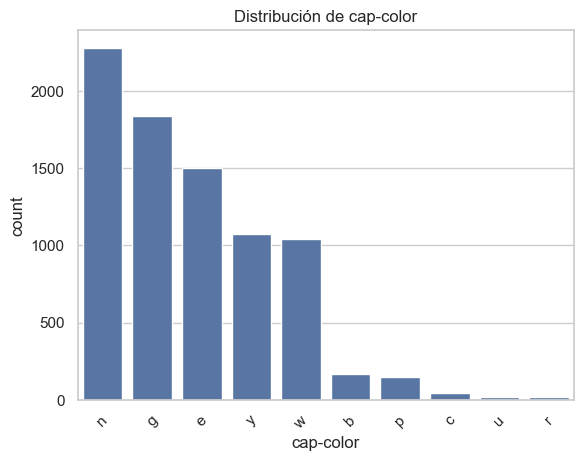


Columna: bruises
bruises
f    4748
t    3376
Name: count, dtype: int64
bruises
f    0.584441
t    0.415559
Name: proportion, dtype: float64


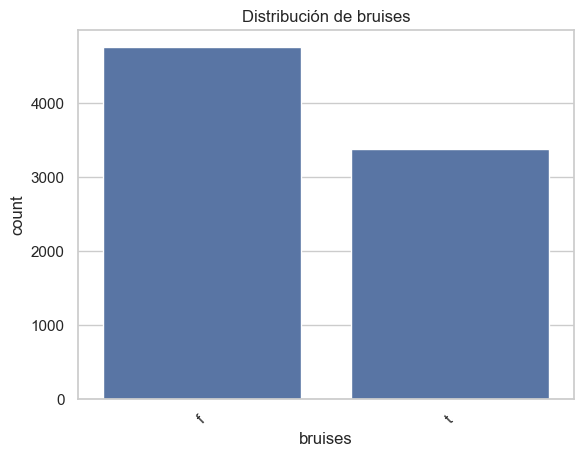


Columna: odor
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64
odor
n    0.434269
f    0.265879
y    0.070901
s    0.070901
a    0.049237
l    0.049237
p    0.031512
c    0.023634
m    0.004431
Name: proportion, dtype: float64


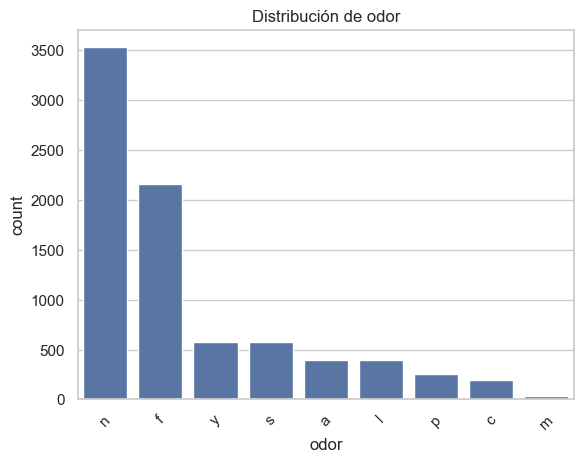


Columna: gill-attachment
gill-attachment
f    7914
a     210
Name: count, dtype: int64
gill-attachment
f    0.974151
a    0.025849
Name: proportion, dtype: float64


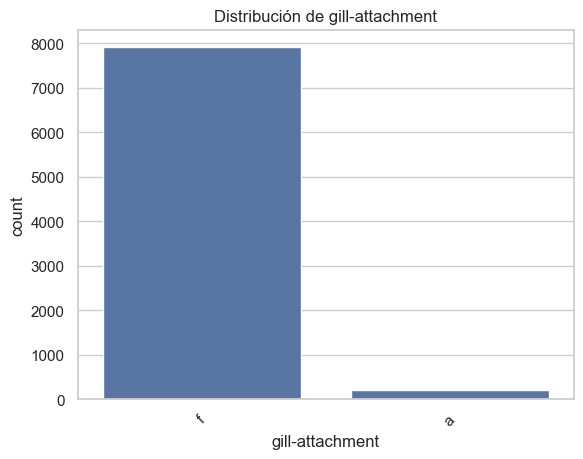


Columna: gill-spacing
gill-spacing
c    6812
w    1312
Name: count, dtype: int64
gill-spacing
c    0.838503
w    0.161497
Name: proportion, dtype: float64


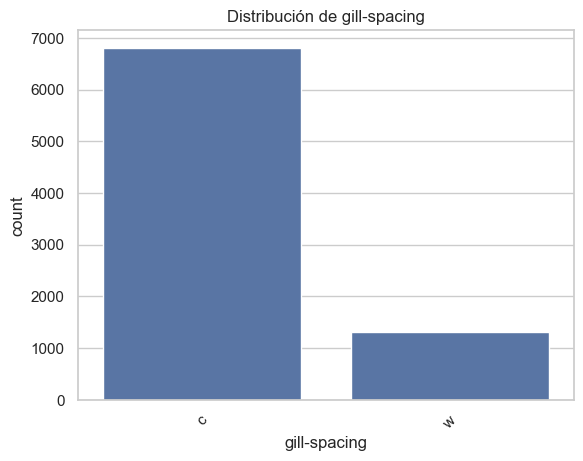


Columna: gill-size
gill-size
b    5612
n    2512
Name: count, dtype: int64
gill-size
b    0.690793
n    0.309207
Name: proportion, dtype: float64


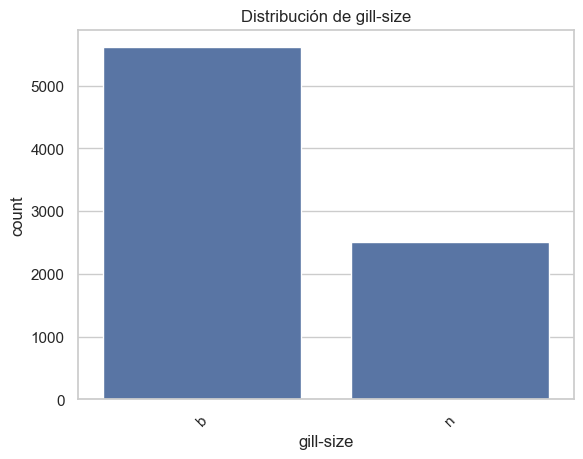


Columna: gill-color
gill-color
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: count, dtype: int64
gill-color
b    0.212703
p    0.183653
w    0.147957
n    0.129000
g    0.092565
h    0.090103
u    0.060561
k    0.050222
e    0.011817
y    0.010586
o    0.007878
r    0.002954
Name: proportion, dtype: float64


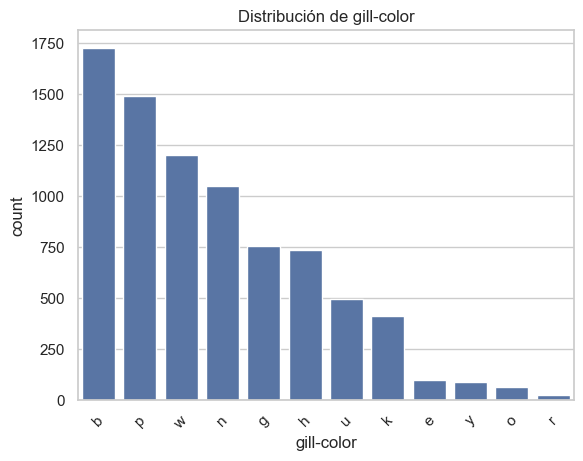


Columna: stalk-shape
stalk-shape
t    4608
e    3516
Name: count, dtype: int64
stalk-shape
t    0.567208
e    0.432792
Name: proportion, dtype: float64


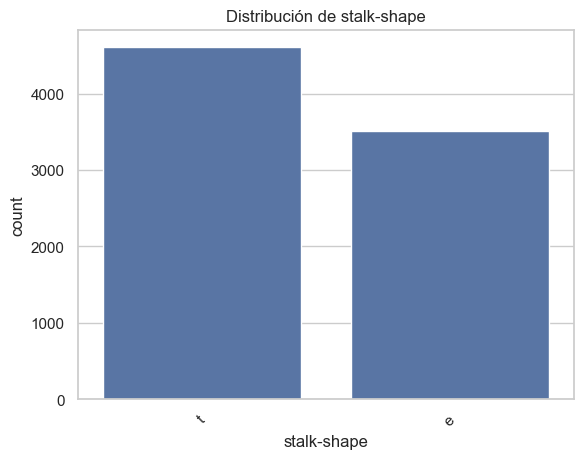


Columna: stalk-root
stalk-root
b    3776
?    2480
e    1120
c     556
r     192
Name: count, dtype: int64
stalk-root
b    0.464796
?    0.305268
e    0.137863
c    0.068439
r    0.023634
Name: proportion, dtype: float64


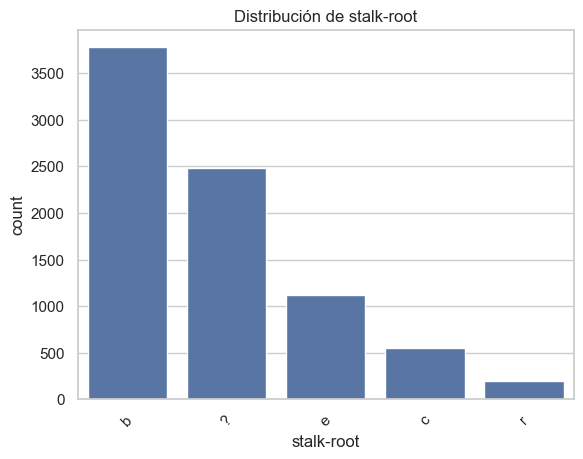


Columna: stalk-surface-above-ring
stalk-surface-above-ring
s    5176
k    2372
f     552
y      24
Name: count, dtype: int64
stalk-surface-above-ring
s    0.637125
k    0.291974
f    0.067947
y    0.002954
Name: proportion, dtype: float64


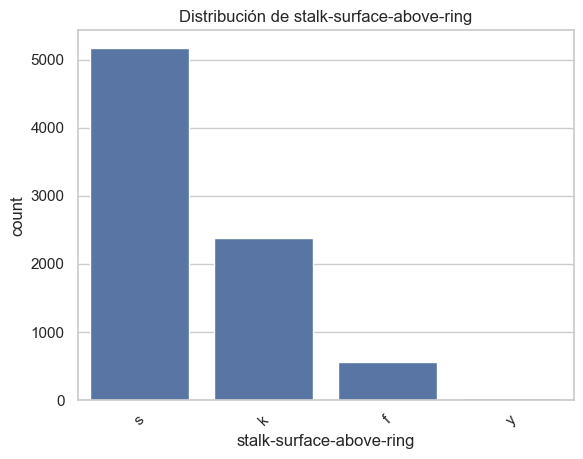


Columna: stalk-surface-below-ring
stalk-surface-below-ring
s    4936
k    2304
f     600
y     284
Name: count, dtype: int64
stalk-surface-below-ring
s    0.607582
k    0.283604
f    0.073855
y    0.034958
Name: proportion, dtype: float64


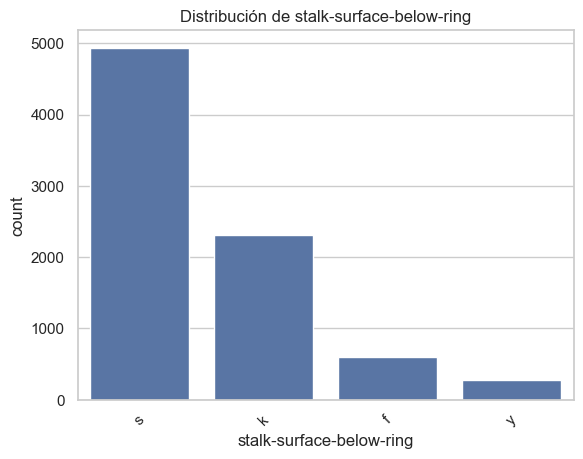


Columna: stalk-color-above-ring
stalk-color-above-ring
w    4464
p    1872
g     576
n     448
b     432
o     192
e      96
c      36
y       8
Name: count, dtype: int64
stalk-color-above-ring
w    0.549483
p    0.230428
g    0.070901
n    0.055145
b    0.053176
o    0.023634
e    0.011817
c    0.004431
y    0.000985
Name: proportion, dtype: float64


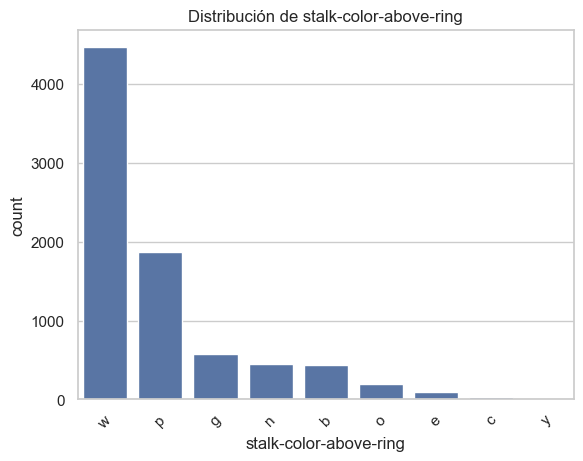


Columna: stalk-color-below-ring
stalk-color-below-ring
w    4384
p    1872
g     576
n     512
b     432
o     192
e      96
c      36
y      24
Name: count, dtype: int64
stalk-color-below-ring
w    0.539636
p    0.230428
g    0.070901
n    0.063023
b    0.053176
o    0.023634
e    0.011817
c    0.004431
y    0.002954
Name: proportion, dtype: float64


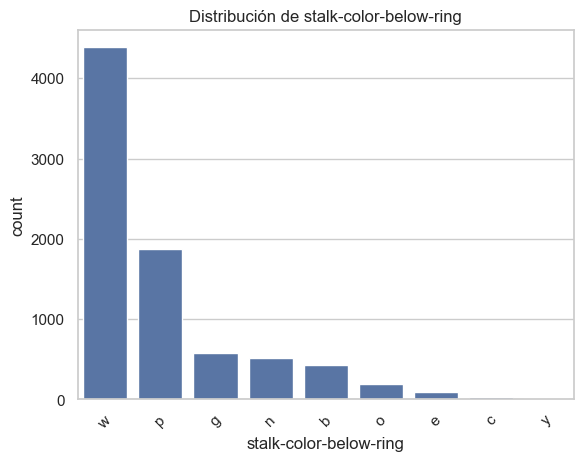


Columna: veil-type
veil-type
p    8124
Name: count, dtype: int64
veil-type
p    1.0
Name: proportion, dtype: float64


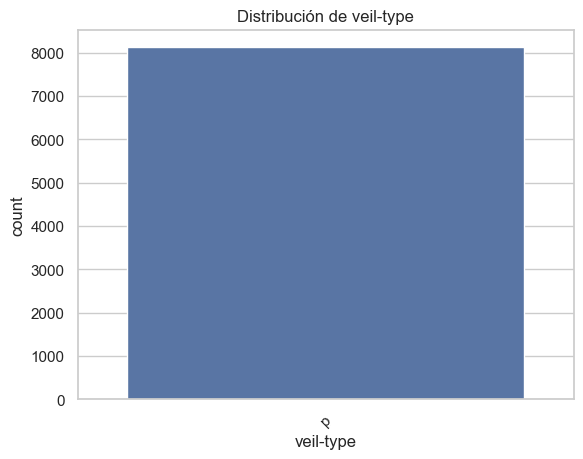


Columna: veil-color
veil-color
w    7924
n      96
o      96
y       8
Name: count, dtype: int64
veil-color
w    0.975382
n    0.011817
o    0.011817
y    0.000985
Name: proportion, dtype: float64


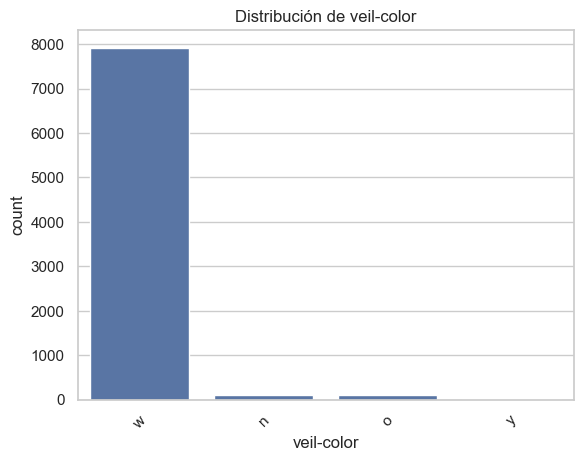


Columna: ring-number
ring-number
o    7488
t     600
n      36
Name: count, dtype: int64
ring-number
o    0.921713
t    0.073855
n    0.004431
Name: proportion, dtype: float64


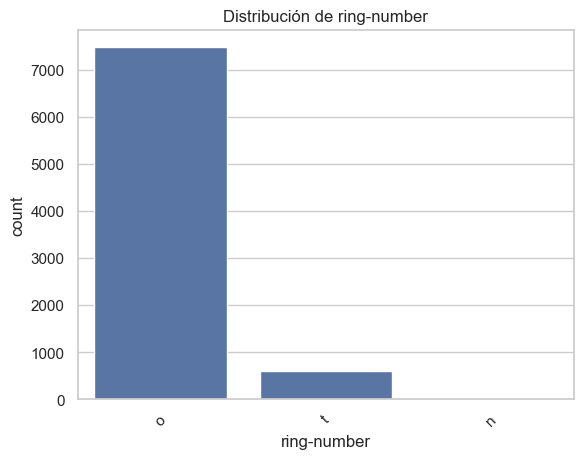


Columna: ring-type
ring-type
p    3968
e    2776
l    1296
f      48
n      36
Name: count, dtype: int64
ring-type
p    0.488429
e    0.341704
l    0.159527
f    0.005908
n    0.004431
Name: proportion, dtype: float64


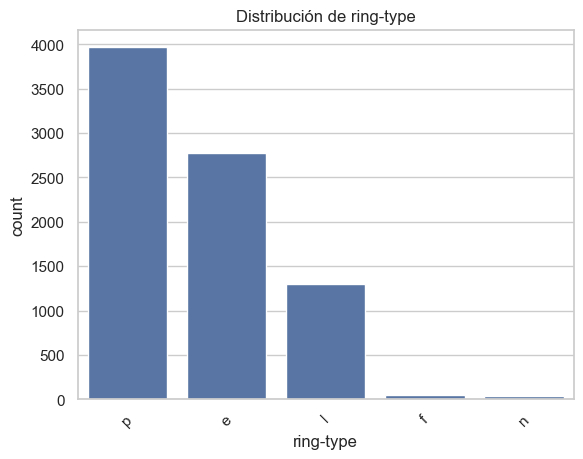


Columna: spore-print-color
spore-print-color
w    2388
n    1968
k    1872
h    1632
r      72
u      48
o      48
y      48
b      48
Name: count, dtype: int64
spore-print-color
w    0.293944
n    0.242245
k    0.230428
h    0.200886
r    0.008863
u    0.005908
o    0.005908
y    0.005908
b    0.005908
Name: proportion, dtype: float64


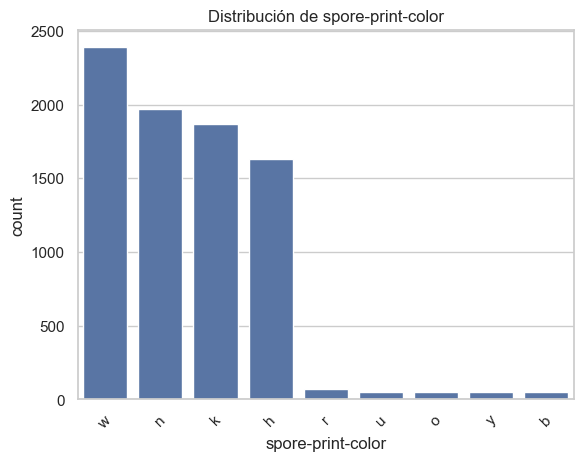


Columna: population
population
v    4040
y    1712
s    1248
n     400
a     384
c     340
Name: count, dtype: int64
population
v    0.497292
y    0.210734
s    0.153619
n    0.049237
a    0.047267
c    0.041851
Name: proportion, dtype: float64


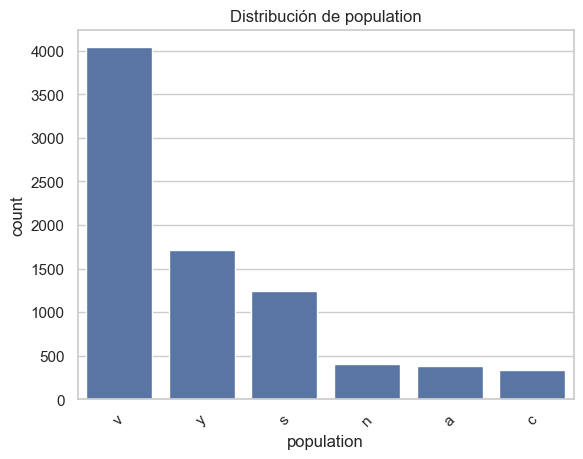


Columna: habitat
habitat
d    3148
g    2148
p    1144
l     832
u     368
m     292
w     192
Name: count, dtype: int64
habitat
d    0.387494
g    0.264402
p    0.140817
l    0.102413
u    0.045298
m    0.035943
w    0.023634
Name: proportion, dtype: float64


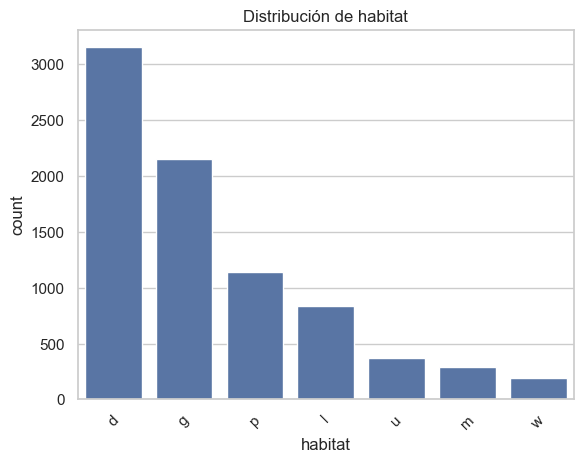

In [6]:
for col in df.columns:
    if col != 'class':  # excluimos la variable objetivo
        print(f"\nColumna: {col}")
        print(df[col].value_counts())
        print(df[col].value_counts(normalize=True))
        
        # Gráfico de barras
        sns.countplot(data=df, x=col, order=df[col].value_counts().index)
        plt.title(f"Distribución de {col}")
        plt.xticks(rotation=45)
        plt.show()

En el análisis se puede ver que algunas columnas están muy sesgadas, o prácticamente no varían, como veil-type (100% de un solo valor) y gill-attachment (97% en una categoría). Estas columnas aportan poca información, por lo que se eliminaron o se marcaron para una limpieza adicional.

Por otro lado, variables como odor, cap-color y cap-shape presentan mayor diversidad de categorías, lo que sugiere que serán muy útiles para la clasificación y el clustering.

También se ve que hay algunas categorías muy poco frecuentes (menos del 1%), que podrían agruparse o descartarse para evitar columnas casi vacías al aplicar One-Hot Encoding.

<h1 style="color:red;">Análisis bivariado</h1>



Variable: cap-shape
class             e         p
cap-shape                    
b          0.893805  0.106195
c          0.000000  1.000000
f          0.506345  0.493655
k          0.275362  0.724638
s          1.000000  0.000000
x          0.532823  0.467177


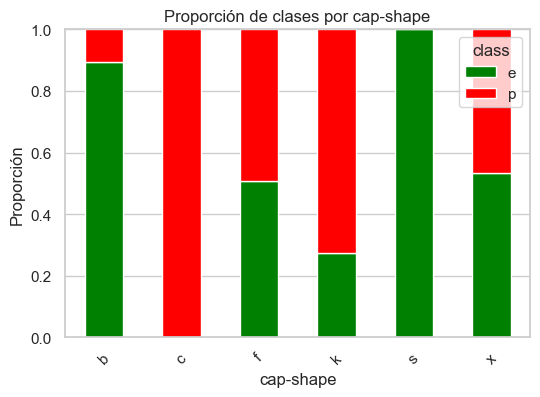


Variable: cap-surface
class               e         p
cap-surface                    
f            0.672414  0.327586
g            0.000000  1.000000
s            0.447574  0.552426
y            0.463625  0.536375


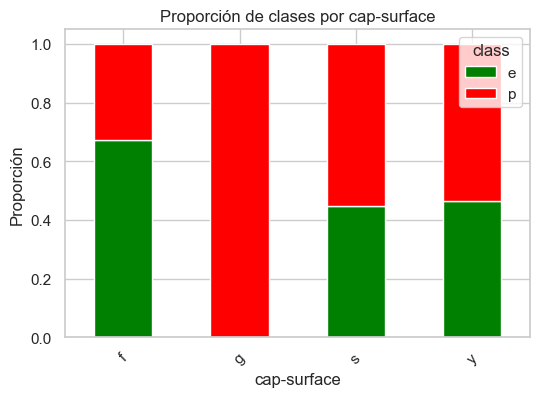


Variable: cap-color
class             e         p
cap-color                    
b          0.285714  0.714286
c          0.727273  0.272727
e          0.416000  0.584000
g          0.560870  0.439130
n          0.553415  0.446585
p          0.388889  0.611111
r          1.000000  0.000000
u          1.000000  0.000000
w          0.692308  0.307692
y          0.373134  0.626866


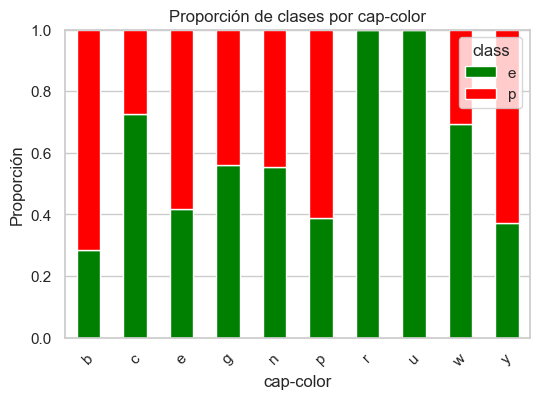


Variable: bruises
class           e         p
bruises                    
f        0.306655  0.693345
t        0.815166  0.184834


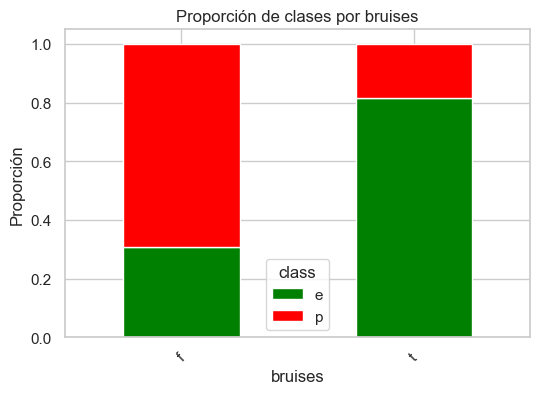


Variable: odor
class         e         p
odor                     
a      1.000000  0.000000
c      0.000000  1.000000
f      0.000000  1.000000
l      1.000000  0.000000
m      0.000000  1.000000
n      0.965986  0.034014
p      0.000000  1.000000
s      0.000000  1.000000
y      0.000000  1.000000


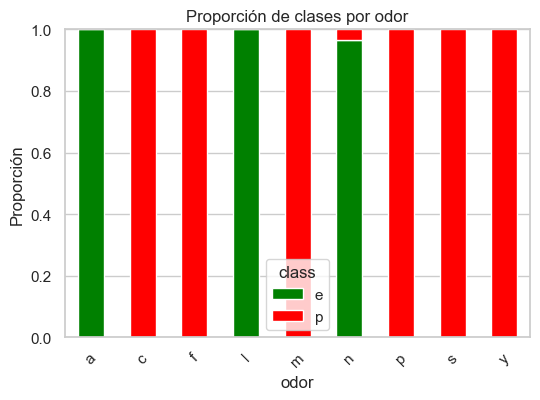


Variable: gill-attachment
class                   e         p
gill-attachment                    
a                0.914286  0.085714
f                0.507455  0.492545


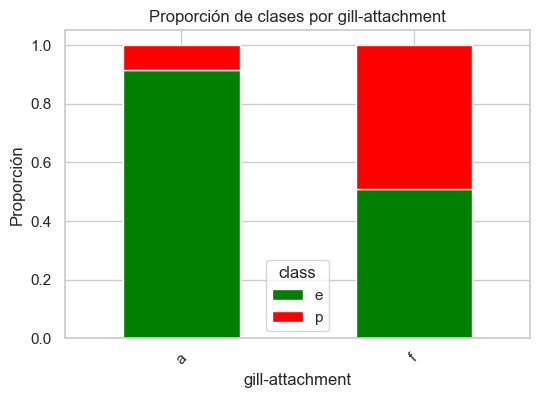


Variable: gill-spacing
class                e         p
gill-spacing                    
c             0.441574  0.558426
w             0.914634  0.085366


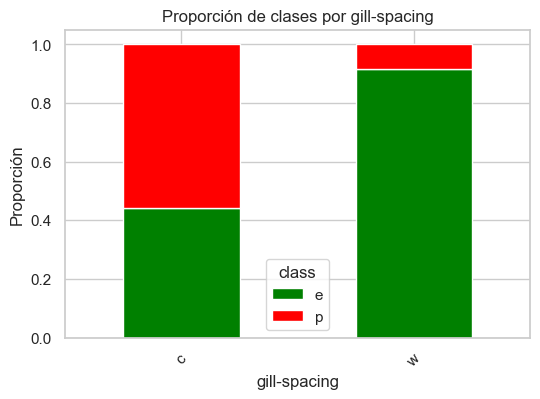


Variable: gill-size
class             e         p
gill-size                    
b          0.698503  0.301497
n          0.114650  0.885350


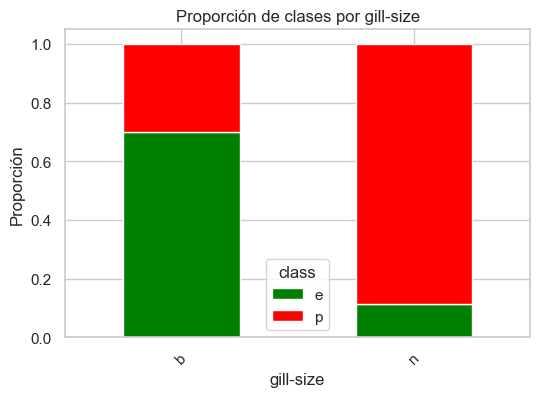


Variable: gill-color
class              e         p
gill-color                    
b           0.000000  1.000000
e           1.000000  0.000000
g           0.329787  0.670213
h           0.278689  0.721311
k           0.843137  0.156863
n           0.893130  0.106870
o           1.000000  0.000000
p           0.571046  0.428954
r           0.000000  1.000000
u           0.902439  0.097561
w           0.795341  0.204659
y           0.744186  0.255814


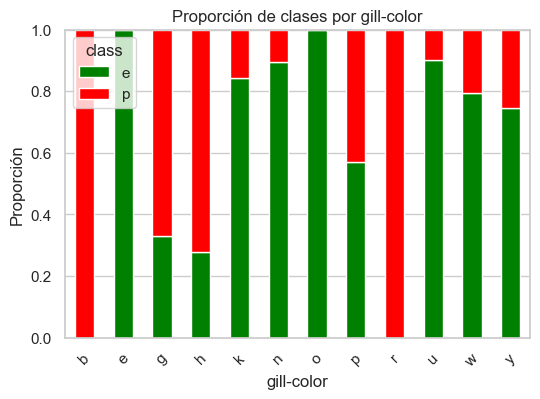


Variable: stalk-shape
class               e         p
stalk-shape                    
e            0.459613  0.540387
t            0.562500  0.437500


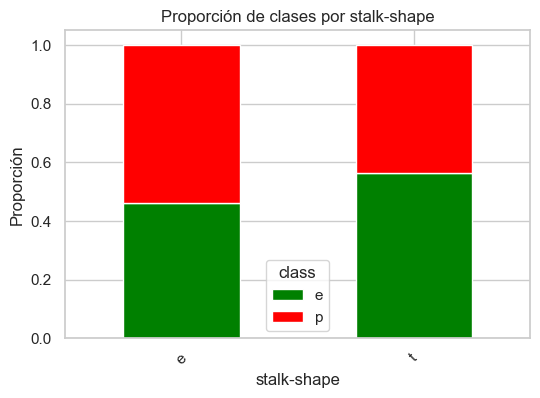


Variable: stalk-root
class              e         p
stalk-root                    
?           0.290323  0.709677
b           0.508475  0.491525
c           0.920863  0.079137
e           0.771429  0.228571
r           1.000000  0.000000


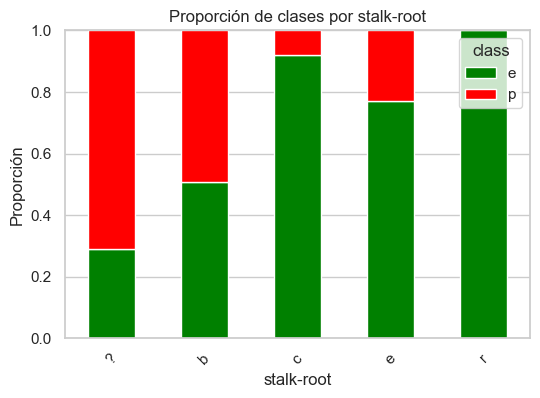


Variable: stalk-surface-above-ring
class                            e         p
stalk-surface-above-ring                    
f                         0.739130  0.260870
k                         0.060708  0.939292
s                         0.703246  0.296754
y                         0.666667  0.333333


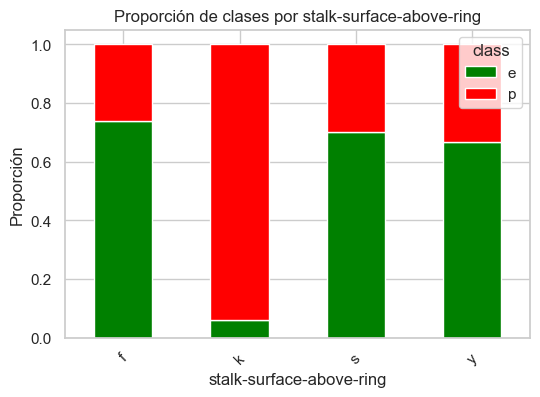


Variable: stalk-surface-below-ring
class                            e         p
stalk-surface-below-ring                    
f                         0.760000  0.240000
k                         0.062500  0.937500
s                         0.688817  0.311183
y                         0.732394  0.267606


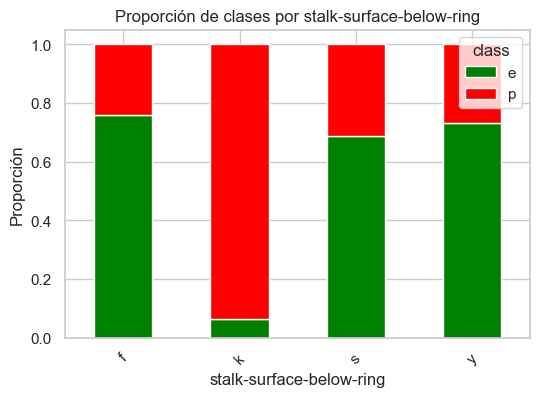


Variable: stalk-color-above-ring
class                          e         p
stalk-color-above-ring                    
b                       0.000000  1.000000
c                       0.000000  1.000000
e                       1.000000  0.000000
g                       1.000000  0.000000
n                       0.035714  0.964286
o                       1.000000  0.000000
p                       0.307692  0.692308
w                       0.616487  0.383513
y                       0.000000  1.000000


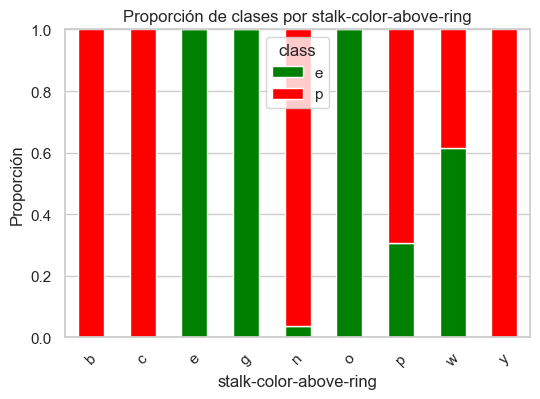


Variable: stalk-color-below-ring
class                          e         p
stalk-color-below-ring                    
b                       0.000000  1.000000
c                       0.000000  1.000000
e                       1.000000  0.000000
g                       1.000000  0.000000
n                       0.125000  0.875000
o                       1.000000  0.000000
p                       0.307692  0.692308
w                       0.616788  0.383212
y                       0.000000  1.000000


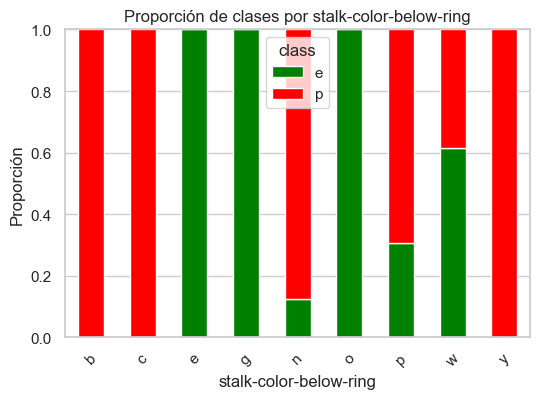


Variable: veil-type
class             e         p
veil-type                    
p          0.517971  0.482029


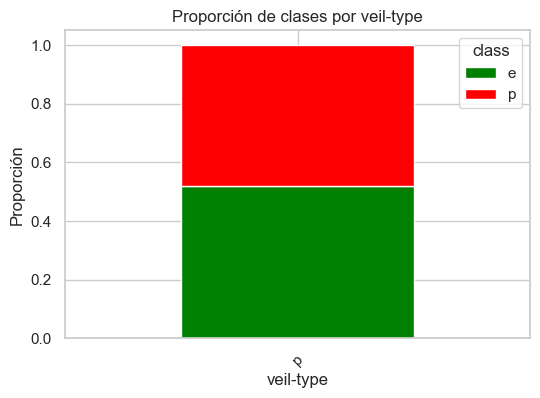


Variable: veil-color
class              e         p
veil-color                    
n           1.000000  0.000000
o           1.000000  0.000000
w           0.506815  0.493185
y           0.000000  1.000000


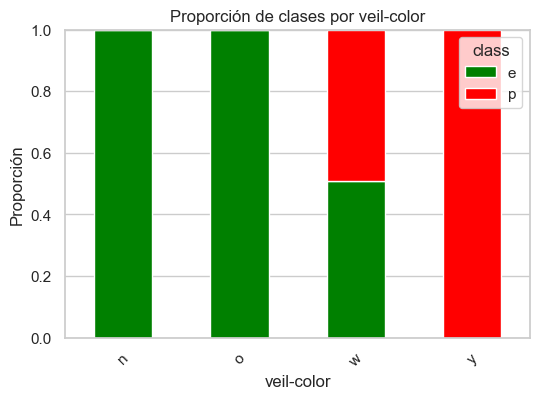


Variable: ring-number
class               e         p
ring-number                    
n            0.000000  1.000000
o            0.491453  0.508547
t            0.880000  0.120000


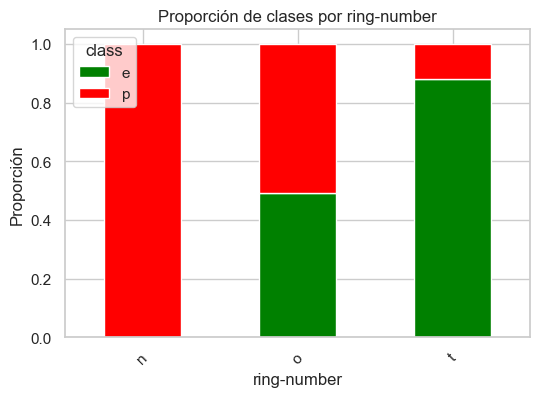


Variable: ring-type
class             e         p
ring-type                    
e          0.363112  0.636888
f          1.000000  0.000000
l          0.000000  1.000000
n          0.000000  1.000000
p          0.794355  0.205645


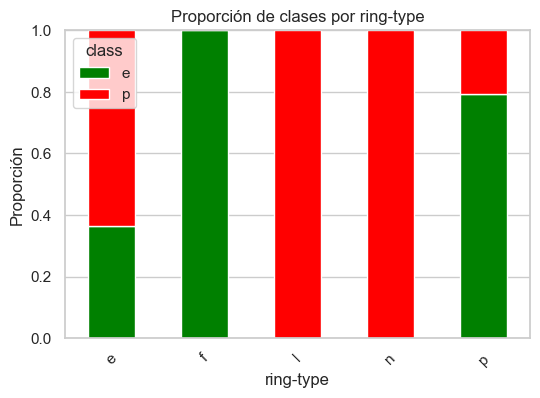


Variable: spore-print-color
class                     e         p
spore-print-color                    
b                  1.000000  0.000000
h                  0.029412  0.970588
k                  0.880342  0.119658
n                  0.886179  0.113821
o                  1.000000  0.000000
r                  0.000000  1.000000
u                  1.000000  0.000000
w                  0.241206  0.758794
y                  1.000000  0.000000


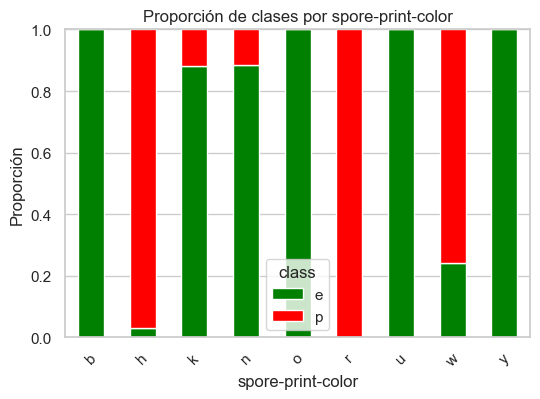


Variable: population
class              e         p
population                    
a           1.000000  0.000000
c           0.847059  0.152941
n           1.000000  0.000000
s           0.705128  0.294872
v           0.295050  0.704950
y           0.621495  0.378505


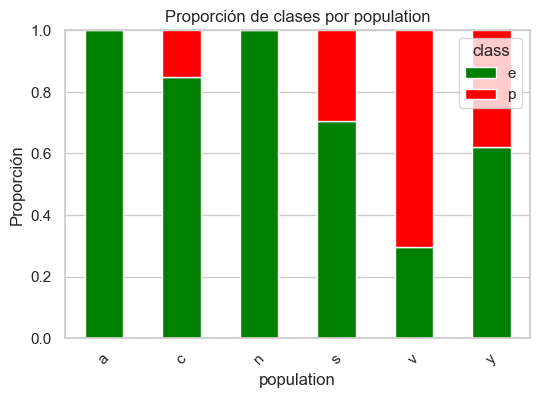


Variable: habitat
class           e         p
habitat                    
d        0.597205  0.402795
g        0.655493  0.344507
l        0.288462  0.711538
m        0.876712  0.123288
p        0.118881  0.881119
u        0.260870  0.739130
w        1.000000  0.000000


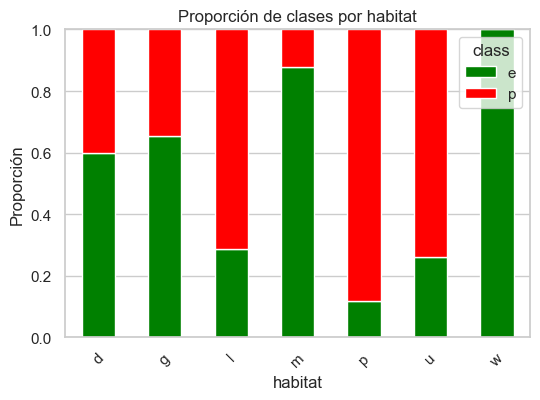

In [7]:
# Iteramos sobre variables categóricas (excluyendo la clase)
for col in df.columns:
    if col != 'class':
        print(f"\nVariable: {col}")
        
        # Crosstab con proporciones
        ct = pd.crosstab(df[col], df['class'], normalize='index')
        print(ct)
        
        # Gráfico apilado
        ct.plot(kind='bar', stacked=True, color=['green','red'], figsize=(6,4))
        plt.title(f"Proporción de clases por {col}")
        plt.ylabel("Proporción")
        plt.xlabel(col)
        plt.xticks(rotation=45)
        plt.show()

Al analizar la relación entre variables y la clase "class", identificamos que algunas variables son altamente discriminativas, como odor, spore-print-color, gill-size y bruises. Estas muestran categorías que corresponden casi exclusivamente a hongos comestibles o venenosos, lo que las convierte en variables clave para la clasificación y el clustering.
Otras variables, como "cap-shape", "cap-color" o "stalk-surface", son moderadamente informativas, con ciertas categorías asociadas a una clase específica.
Finalmente, variables como "stalk-shape" o "veil-color" presentan mezcla entre clases, aportando poca discriminación, pero pueden contribuir al modelo de manera complementaria.

<h1 style="color:red;">Variables más discriminativas</h1>
Aquí buscamos identificar cuáles columnas realmente ayudan a diferenciar entre hongos comestibles y venenosos. Esto será muy útil para:

Priorizar variables al usar Random Forest.

Seleccionar las más relevantes para PCA y clustering.

Variables más discriminativas según información mutua:
odor                        0.628043
spore-print-color           0.333199
gill-color                  0.289027
ring-type                   0.220436
stalk-surface-above-ring    0.197357
stalk-surface-below-ring    0.188463
stalk-color-above-ring      0.175952
stalk-color-below-ring      0.167337
gill-size                   0.159531
population                  0.139987
bruises                     0.133347
habitat                     0.108709
stalk-root                  0.093448
gill-spacing                0.069927
cap-shape                   0.033823
ring-number                 0.026653
cap-color                   0.024987
cap-surface                 0.019817
veil-color                  0.016509
gill-attachment             0.009818
stalk-shape                 0.005210
veil-type                   0.000000
dtype: float64


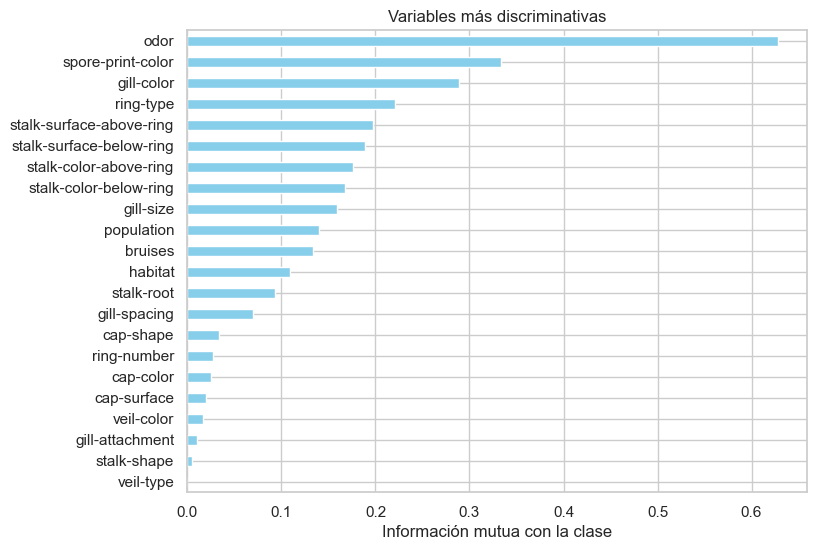

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif

# Codificar variables categóricas a números
df_encoded = df.copy()
le = LabelEncoder()
for col in df_encoded.columns:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Separar X e y
X = df_encoded.drop('class', axis=1)
y = df_encoded['class']

# Calcular información mutua
mi = mutual_info_classif(X, y, discrete_features=True)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)

print("Variables más discriminativas según información mutua:")
print(mi_series)

# Gráfico
mi_series.plot(kind='barh', figsize=(8,6), color='skyblue')
plt.xlabel("Información mutua con la clase")
plt.title("Variables más discriminativas")
plt.gca().invert_yaxis()
plt.show()

Al analizar la información mutua, se vé qué variables aportan más para diferenciar entre hongos comestibles y venenosos.
Como era de esperar, odor resulta ser la variable más discriminativa, seguida de spore-print-color, gill-color y ring-type. Estas variables muestran una fuerte relación con la clase y serán claves tanto para modelos supervisados como para técnicas de clustering.

Por otro lado, variables como cap-color, cap-surface o veil-color aportan muy poca información, por lo que es probable que tengan un impacto limitado en los modelos.

<h1 style="color:red;">Conclusión del EDA</h1>
El análisis exploratorio del dataset de setas revela un patrón claro: aunque muchas variables son categóricas, unas pocas, como "odor" y "spore-print-color", permiten distinguir con bastante precisión entre hongos comestibles y venenosos.

Este conocimiento será clave para elegir las features en los modelos supervisados y no supervisados, asegurando que aprovechemos la información más útil sin ruido de variables irrelevantes.

Además, se eliminarán columnas como "veil-type" y "gill-attachment", que aportan muy poca información, simplificando tanto el análisis como los modelos. De esta manera, el dataset limpio quedará listo para la siguiente fase de modelado.